In [10]:
from flask import Flask

In [11]:
app = Flask(__name__)

In [12]:
@app.route('/')
def hello_world():
   return "Hello World"

In [13]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [15]:
data=pd.read_csv("C:/Users/adnan/Downloads/garments_worker_productivity.csv")

In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

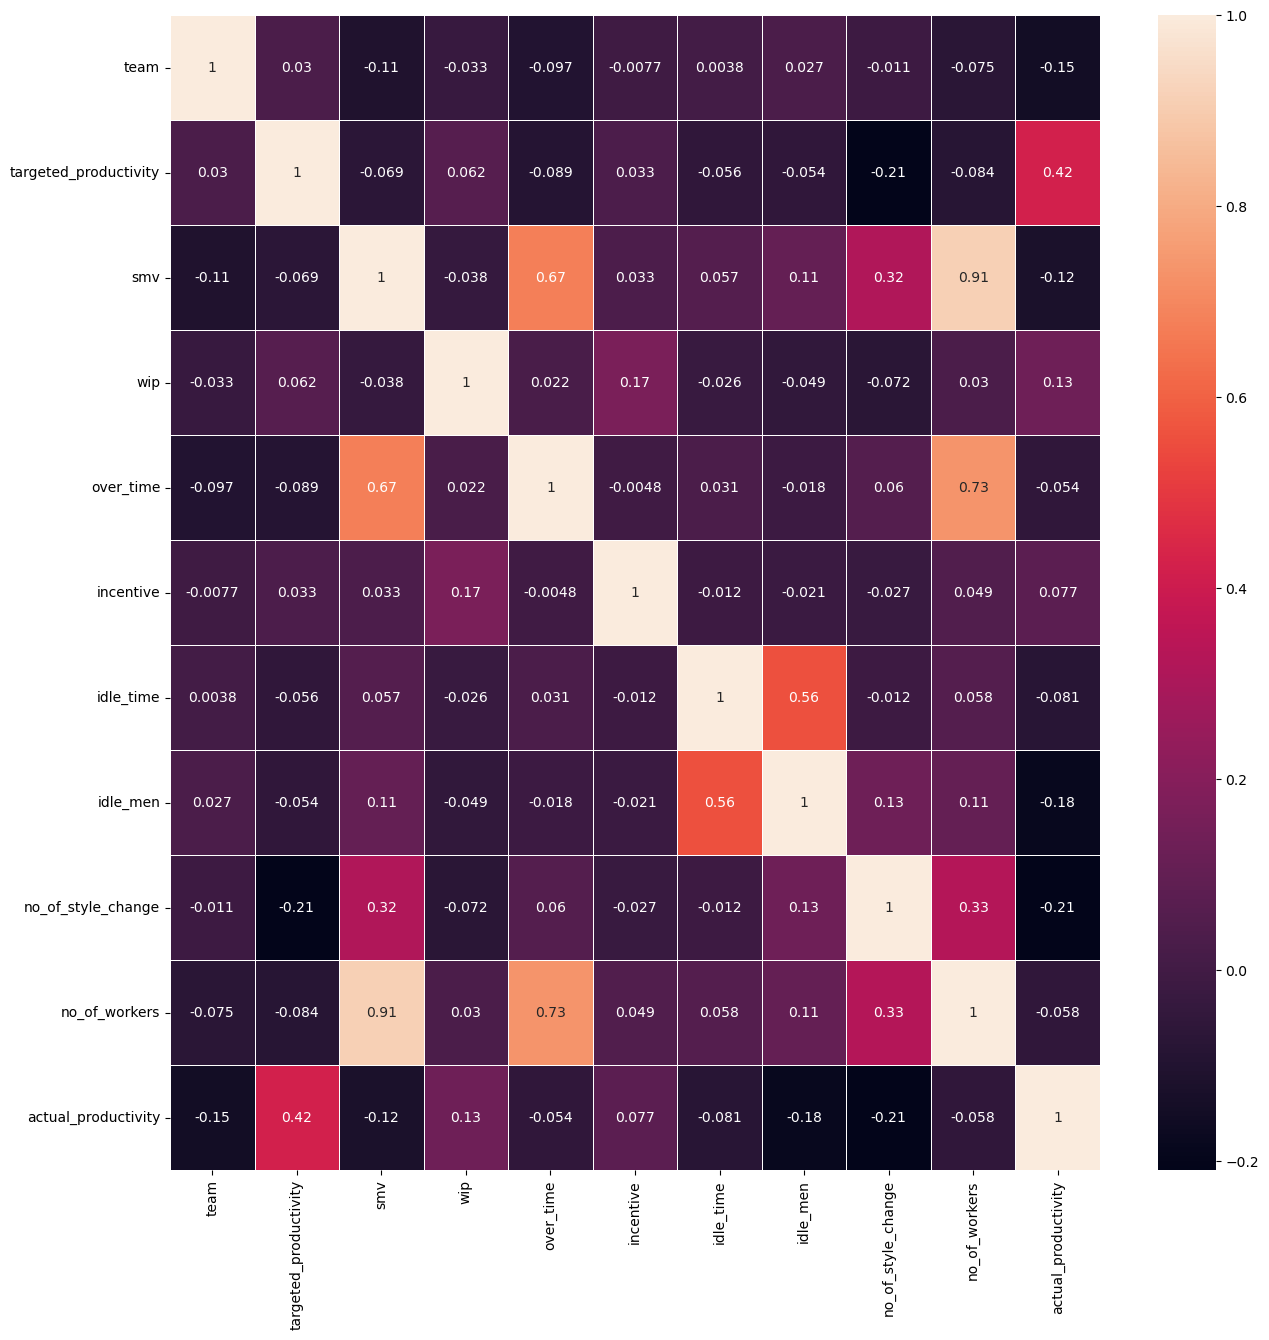

In [18]:
# Use the numeric_only=True argument to skip non-numeric columns
corrMatrix = data.corr(numeric_only=True)

# Continue with your plotting code
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [19]:
data.shape

(1197, 15)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [21]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [22]:
data.drop(['wip'],axis=1,inplace=True)

In [23]:
data["date"] = pd.to_datetime(data["date"])

In [24]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [25]:
data['month'] = data['date'].dt.month
data.drop(['date'],axis=1, inplace=True)

In [26]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [27]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [28]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace("","") == 'finishing' else 'sweing')

In [29]:
data['department'].value_counts()

department
sweing       948
finishing    249
Name: count, dtype: int64

In [30]:
data['department'].value_counts()

department
sweing       948
finishing    249
Name: count, dtype: int64

In [31]:
pip install MultiColumnLabelEncoder

Note: you may need to restart the kernel to use updated packages.


In [32]:
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()

In [33]:
import pandas as pd
# Replace 'your_data_file.csv' with the actual path to your file
data=pd.read_csv("C:/Users/adnan/Downloads/garments_worker_productivity.csv")

In [34]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()

In [35]:
data = Mcle.fit_transform(data)
# The fit_transform method will convert the categorical (text/object) columns 
# in the 'data' DataFrame into numerical labels, overwriting the original 'data'.

In [36]:
x = data.drop(['actual_productivity'],axis = 1)

In [37]:
y = data['actual_productivity']

In [38]:
X = x.to_numpy()

In [39]:
X

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. , 59. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  8. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , 30.5],
       ...,
       [58. ,  1. ,  2. , ...,  0. ,  0. ,  8. ],
       [58. ,  1. ,  2. , ...,  0. ,  0. , 15. ],
       [58. ,  1. ,  2. , ...,  0. ,  0. ,  6. ]])

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=0)

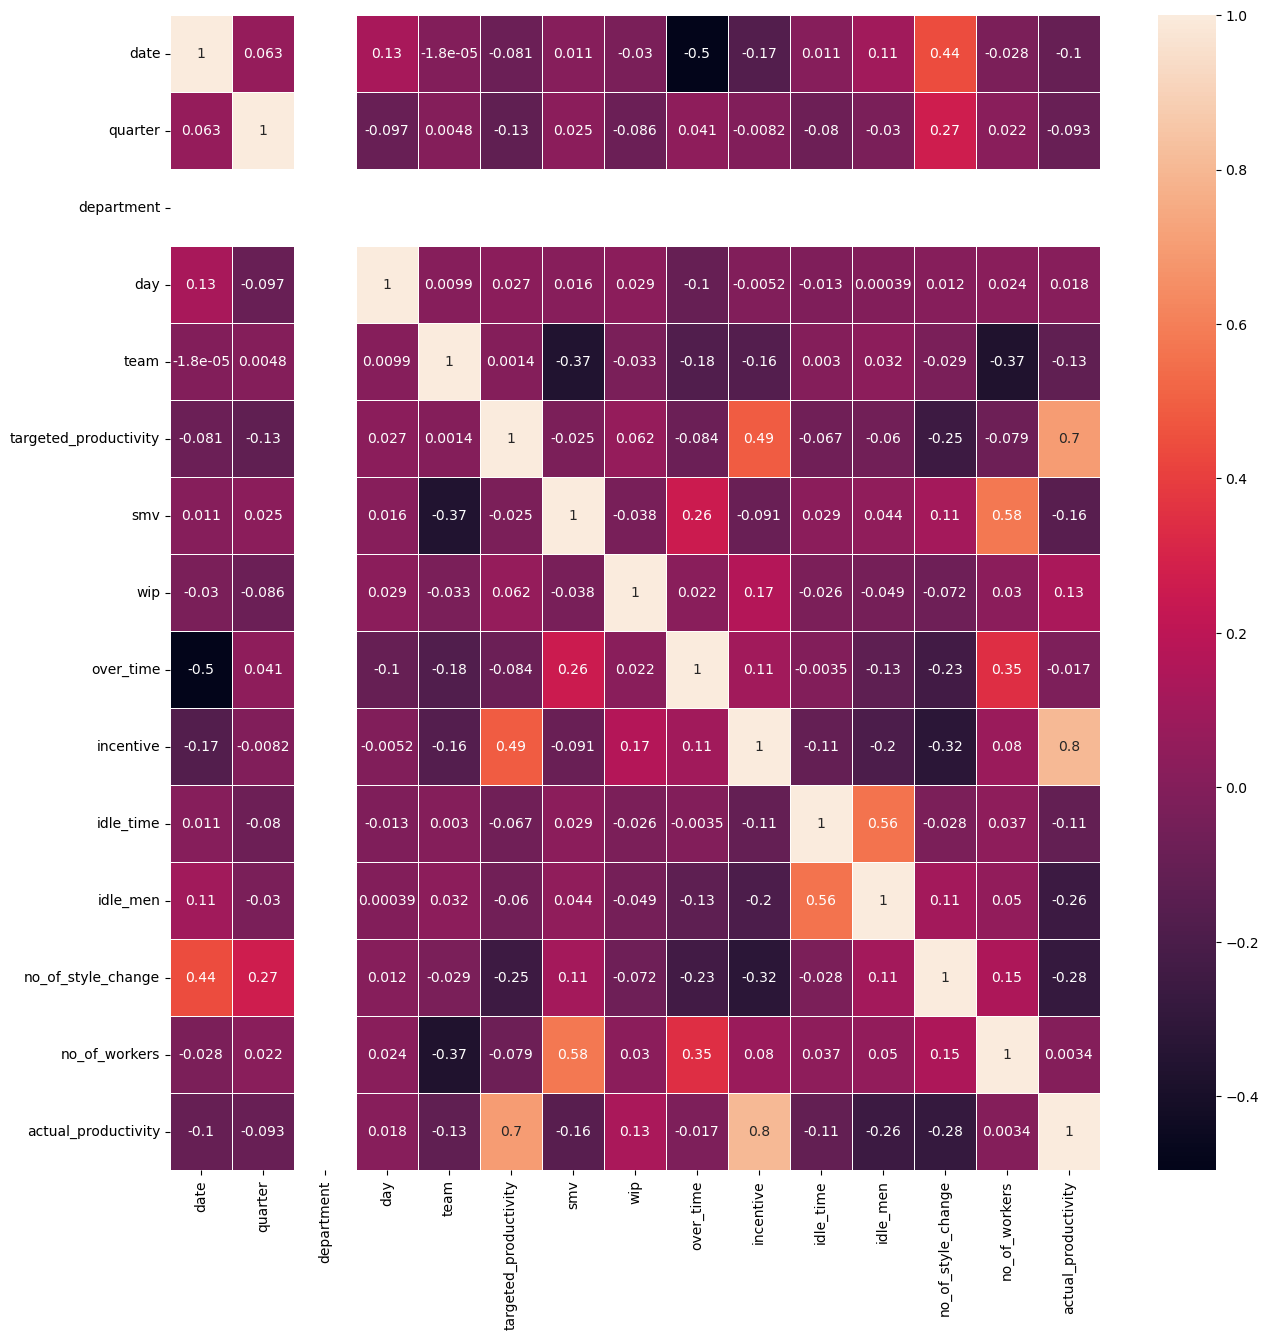

test_MSE: 0.007205519722871158
test_MAE: 0.05083166676208539
R2_score:0.738070640671709


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


data = Mcle.fit_transform(data) 


data = data.dropna() 


corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()


X = data.drop('actual_productivity', axis=1)
y = data['actual_productivity']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model_lr = LinearRegression()


model_lr.fit(x_train, y_train) 



pred_test = model_lr.predict(x_test)



print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

In [42]:
print(X.shape)
print(y.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(691, 14)
(691,)
(552, 14) (139, 14) (552,) (139,)


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the Model
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0) # Added random_state for reproducibility

# 2. TRAIN THE MODEL (The essential missing step)
# This uses the training data to build the forest of 200 trees.
model_rf.fit(x_train, y_train) 

# 3. MAKE PREDICTIONS 
pred = model_rf.predict(x_test)

# 4. EVALUATE THE MODEL (Your original code)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.005849626672285041
test_MAE: 0.04318457595893497
R2_score:0.7873589934508184


In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the Model
# This line is correct from your image
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=0) 

# 2. TRAIN THE MODEL (The essential missing step)
# This calculates the decision boundaries and internal parameters.
model_xgb.fit(x_train, y_train) 

# 3. MAKE PREDICTIONS 
# Now this will run without error.
pred3 = model_xgb.predict(x_test)

# 4. EVALUATE THE MODEL (Your original code)
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0047212919245998445
test_MAE: 0.03912180512549207
R2_score:0.8283753266142599


In [45]:
pip install xgboost

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the Model
# This line is correct from your image
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=0) 

# 2. TRAIN THE MODEL (The essential missing step)
# This calculates the decision boundaries and internal parameters.
model_xgb.fit(x_train, y_train) 

# 3. MAKE PREDICTIONS 
# Now this will run without error.
pred3 = model_xgb.predict(x_test)

# 4. EVALUATE THE MODEL (Your original code)
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))



test_MSE: 0.0047212919245998445
test_MAE: 0.03912180512549207
R2_score:0.8283753266142599


In [47]:
pred3 = model_xgb.predict(x_test)

# 4. EVALUATE THE MODEL (Your original code)
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0047212919245998445
test_MAE: 0.03912180512549207
R2_score:0.8283753266142599


In [52]:
import pickle

pickle.dump(model_xgb, open("model_xgb.pkl", "wb"))
pickle.dump(Mcle, open("encoder.pkl", "wb"))

In [53]:
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)

# Load saved model and encoder
model = pickle.load(open("model_xgb.pkl", "rb"))
encoder = pickle.load(open("encoder.pkl", "rb"))

# Home Page
@app.route('/')
def home():
    return render_template('Home.html')

# About Page
@app.route('/about')
def about():
    return render_template('About.html')

# Predict Page
@app.route('/predict', methods=['GET'])
def predict_form():
    return render_template('predict.html')

# Handle Form Submission
@app.route('/submit', methods=['POST'])
def submit():
    quarter = request.form['quarter']
    department = request.form['department']
    day = request.form['day']
    team = request.form['team']
    targeted_productivity = request.form['targeted_productivity']
    smv = request.form['smv']
    over_time = request.form['over_time']
    incentive = request.form['incentive']
    idle_time = request.form['idle_time']
    idle_men = request.form['idle_men']
    no_of_style_change = request.form['no_of_style_change']
    no_of_workers = request.form['no_of_workers']
    month = request.form['month']

    total = np.array([[ 
        int(quarter), int(department), int(day), int(team),
        float(targeted_productivity), float(smv), int(over_time), int(incentive),
        float(idle_time), int(idle_men), int(no_of_style_change),
        float(no_of_workers), int(month)
    ]])

    prediction = model.predict(total)[0]

    if prediction < 0.3:
        text = "The employee is averagely productive."
    elif prediction <= 0.8:
        text = "The employee is medium productive."
    else:
        text = "The employee is highly productive."

    return render_template('Submit.html', prediction_text=text)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\adnan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
